In [6]:
# import modules
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# define function get_moon_data()
def get_moon_data():
  X,y=make_moons(n_samples=150, noise=0.1, random_state=42)
  X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.33, random_state=42)
  return [X_train, X_test, y_train, y_test]

In [7]:
# import module
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# get moon data
X_train, X_test, y_train, y_test=get_moon_data()

# initiate and fit the decision tree object
clf=DecisionTreeClassifier(max_depth=3,random_state=42)
clf.fit(X_train,y_train)

# predict test data and compute f1 score
y_pred=clf.predict(X_test)
f1=f1_score(y_test,y_pred)
print("f1 score is = "+str(f1))

f1 score is = 0.8636363636363636


[Text(0.5, 0.875, 'X[1] <= 0.078\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2, 0.625, 'X[0] <= -0.499\ngini = 0.095\nsamples = 40\nvalue = [2, 38]'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.375, 'X[1] <= 0.032\ngini = 0.05\nsamples = 39\nvalue = [1, 38]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(0.4, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.8, 0.625, 'X[0] <= 1.493\ngini = 0.32\nsamples = 60\nvalue = [48, 12]'),
 Text(0.7, 0.375, 'X[1] <= 0.599\ngini = 0.171\nsamples = 53\nvalue = [48, 5]'),
 Text(0.6, 0.125, 'gini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

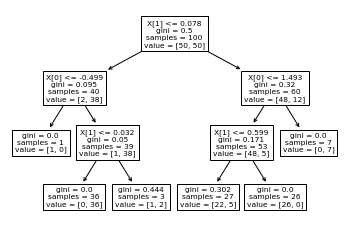

In [8]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [9]:
from sklearn.tree import export_graphviz
import graphviz

dot_data=export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph.render('moon_tree')

'moon_tree.pdf'

In [10]:
from sklearn.tree import export_graphviz
import graphviz
dot_data=export_graphviz(clf,out_file=None,feature_names=["X_1","X_2"],class_names=["top","bottom"],filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graph.render("moon_tree_ver2")

'moon_tree_ver2.pdf'

In [11]:
from sklearn.tree import export_text
r=export_text(clf,feature_names=["X_1","X_2"])
print(r)

|--- X_2 <= 0.08
|   |--- X_1 <= -0.50
|   |   |--- class: 0
|   |--- X_1 >  -0.50
|   |   |--- X_2 <= 0.03
|   |   |   |--- class: 1
|   |   |--- X_2 >  0.03
|   |   |   |--- class: 1
|--- X_2 >  0.08
|   |--- X_1 <= 1.49
|   |   |--- X_2 <= 0.60
|   |   |   |--- class: 0
|   |   |--- X_2 >  0.60
|   |   |   |--- class: 0
|   |--- X_1 >  1.49
|   |   |--- class: 1



In [12]:
# import module
from sklearn.ensemble import RandomForestClassifier

#get moon data
X_train, X_test, y_train, y_test=get_moon_data()

# initiate and fit the decision tree object
clf=RandomForestClassifier(max_depth=3,n_estimators=10,max_features="sqrt",random_state=42,oob_score=True)
clf.fit(X_train,y_train)

# predict test data and compute f1 score
y_pred=clf.predict(X_test)
f1=f1_score(y_test,y_pred)
print("f1 score is = "+str(f1))

# validate using out-of-bag
oob_score=clf.oob_score_
print("OOB score is = "+str(oob_score))

f1 score is = 0.888888888888889
OOB score is = 0.9


In [13]:
## cross validation
# load iris and create X,y
from sklearn.datasets import load_iris
dataset=load_iris()
X,y=dataset.data, dataset.target

# import module
from sklearn.model_selection import train_test_split

# create train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.33,random_state=42)

# create validation set from training set
X_train, X_val, y_train, y_val=train_test_split(X_train,y_train,test_size=.33,random_state=42)

In [14]:
## k-fold cross validation
#load iris and create X and y
from sklearn.datasets import load_iris
dataset=load_iris()
X,y=dataset.data, dataset.target

# import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# create train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.33,random_state=42)

# instantiate classifier object and pass to cross_val_score function
clf=LogisticRegression(multi_class='ovr')
scores=cross_val_score(clf,X_train,y_train,cv=5,scoring="accuracy")
print(scores)

[1.   0.85 0.9  1.   0.9 ]


In [15]:
# grid search with k-fold cross-validation
# load iris and create X and y
from sklearn.datasets import load_iris
dataset=load_iris()
X,y=dataset.data, dataset.target

# import modules
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split

# create train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.33,random_state=42)

# instantiate svc and gridsearch object and fit
params={'kernel':('linear','rbf'),"C":[1,5,10]}
svc=SVC(gamma='auto')
clf=GridSearchCV(svc,params,cv=5,scoring='f1_macro')
clf.fit(X_train,y_train)

# print best scoring classifier
print("Best score is = "+str(clf.best_score_))
print("Best parameters are = "+str(clf.best_params_))

Best score is = 0.9515384615384616
Best parameters are = {'C': 5, 'kernel': 'linear'}


In [16]:
# use the resulting classifier to predict on new data
y_pred=clf.predict(X_test)
f1=metrics.f1_score(y_test,y_pred,average="macro")
print("f1 score is = "+str(f1))

f1 score is = 0.9784047370254267


In [17]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# DecisionTree Classifier
dt_clf = DecisionTreeClassifier(random_state=10)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=10)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

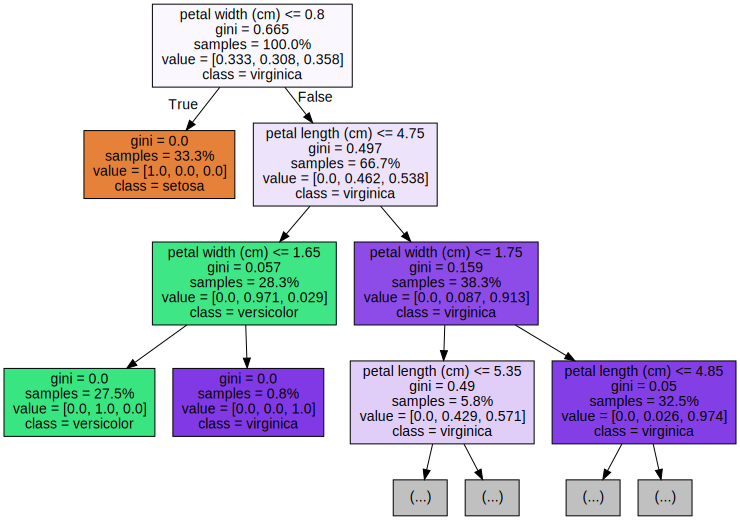

In [18]:
dot_data = export_graphviz(dt_clf
                          , max_depth=3
                          , feature_names=iris_data.feature_names
                          , class_names=iris_data.target_names
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))